# Cours PCD – Labo 4 : ACP sur des images


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

## 1) Description du jeu de données « Olivetti Faces »

Chargement du jeu de données et affichage de sa description intégrée:

In [2]:
olivetti = datasets.fetch_olivetti_faces()
print(olivetti["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
print(np.shape(olivetti["data"]))
print(np.shape(olivetti["images"]))
print(np.shape(olivetti["target"]))

(400, 4096)
(400, 64, 64)
(400,)


On apprend que le jeu de données de 400 images contient 3 parties:

* `data` qui contient les données des images (valeurs des pixels en N&B de 0 à 1) avec 4096 dimensions (pixels) pour chaque image.
* `images` qui contient les données des images sous forme de matrices 64x64.
* `target` qui contient les 40 classes (personnes) du jeu de données, ce qui correspond à 10 par classe.

### b) Nombre de personnes représentées

Il y a 40 personnes représentées avec 10 photos par personne.

### c) Information sur les images

Les images ont une taille de 64 par 64, soit 4096 pixels.

Les images sont encodées en noirs et blancs, avec 256 niveaux de gris (8 bits). Ces valeurs sont actuellement chargées en tant que _float_ compris dans [0, 1], au lieu d'un nombre entier compris dans [0, 255].

In [4]:
len(np.unique(olivetti["data"], axis=0))

400

On constate qu'il n'y a pas d'images dupliquées.

### d) Affichage d'un exemple d'image

In [5]:
def img_plot(img_data):
    fig=plt.figure()
    fig.add_subplot(xticks=[], yticks=[])
    ax = plt.imshow(img_data,cmap=plt.cm.bone)

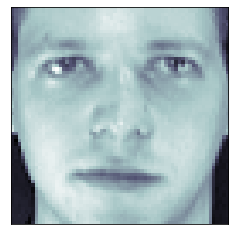

In [6]:
img_plot(olivetti["images"][0])

## 2) Préparation des jeux de données

In [7]:
from sklearn.model_selection import train_test_split
faces = olivetti

In [8]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    random_state=0, 
                                                    stratify=faces.target,
                                                    train_size=0.8)

In [9]:
X_train.shape

(320, 4096)

In [10]:
y_train.shape

(320,)

In [11]:
X_test.shape

(80, 4096)

In [12]:
y_test.shape

(80,)

On constate que les dimensions correspondent au ratio de 80% pour l'entraînement et 20% pour le test.

## 3) Accuracy de la classification du jeux de données avec différents Classifieurs

In [13]:
from sklearn.metrics import accuracy_score

### 3.1) KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 87.50%


### 3.2) régression logistique

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(penalty='none', solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy : {:.2%}'.format(accuracy_score(y_test,y_pred)))

accuracy : 95.00%


### 3.3) SVM

In [18]:
from sklearn.svm           import SVC
from sklearn.pipeline      import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 92.50%


## 4) Application de la méthode ACP avec 150 composantes principales 

In [19]:
from sklearn import decomposition

In [20]:
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

### 4.1) Construction  des composantes appelées « eigenfaces »

#### 4.1.1) "Mean face"

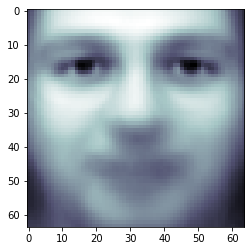

In [21]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

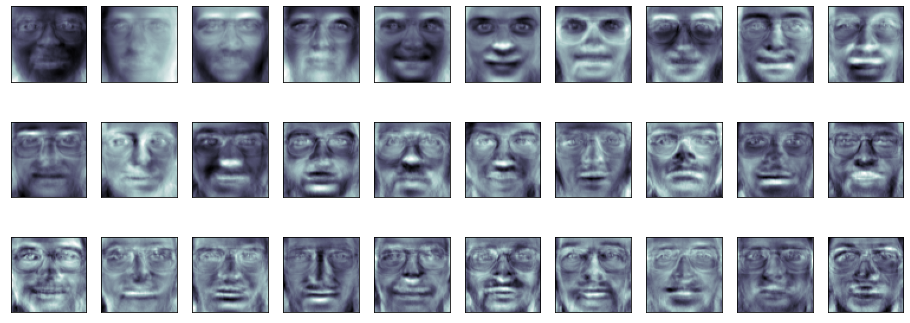

In [22]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

#### 4.2)  appliquez la transformation aux données d’entraînement, puis de test.

In [23]:
# Application de la transformation aux données d’entraînement
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

(320, 150)


In [24]:
# Application de la transformation aux données d’entraînement
X_test_pca  = pca.transform(X_test)
print(X_test_pca.shape)

(80, 150)


NB : Les données doivent être centrées ; le ACP le fait impicitement.

### 5) Classification du jeux de données avec différents Classifieurs et avec les données transformées

### 5.1) KNN

In [25]:
clf = KNeighborsClassifier()
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred_pca)))

accuracy : 57.50%


l'accuracy sans ACP est 87.50% contre  un accuracy avec de  60.00%.
Pour le classifieur KNN, on obtient donc une meilleure accuracy sans ACP.

### 5.2) régression logistique

In [26]:
clf = LogisticRegression(penalty='none', solver='newton-cg')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 93.75%


l'accuracy sans ACP est 95.00% contre  un accuracy avec de   92.50%.
Pour le classifieur régression logistique, on obtient donc une meilleure accuracy sans ACP.

### 5.3) SVM

In [27]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 92.50%


Pour le classifieur on obtient le même accuracy 

## 6) le nombre de composantes principales (à 10 près) qui donne le meilleur score sur le jeu de test.


In [28]:
import pandas as pd

### 6.1) KNN

In [30]:
df_accuracy_score_KNN = pd.DataFrame(columns=['number_of_components', 'accuracy'])

for n in range(1, 320, 10): 
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = KNeighborsClassifier()
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred),2)}, index=[0])
        
    df_accuracy_score_KNN = pd.concat([df_accuracy_score_KNN, newRow], ignore_index=True, axis=0)
    
df_accuracy_score_KNN

,number_of_components,accuracy
0,1,0.24
1,11,0.85
2,21,0.86
3,31,0.88
4,41,0.84
5,51,0.81
6,61,0.79
7,71,0.84
8,81,0.79
9,91,0.71


Nous remarquons que la meilleure accuracy est obtenue avec 31 composants (0.88), donc nous pouvons affirmer que le fait d’avoire plus de composants ne signifie pas forcément une meilleure performance.

In [31]:
df_accuracy_score_LinReg = pd.DataFrame(columns=['number_of_components', 'accuracy'])

for n in range(1, 320, 10): 
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = LogisticRegression(penalty='none', solver='newton-cg')
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred), 2)}, index=[0])
        
    df_accuracy_score_LinReg = pd.concat([df_accuracy_score_LinReg, newRow], ignore_index=True, axis=0)

df_accuracy_score_LinReg

C:\Users\Helpdesk\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Helpdesk\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


,number_of_components,accuracy
0,1,0.12
1,11,0.91
2,21,0.94
3,31,0.96
4,41,0.96
5,51,0.98
6,61,0.94
7,71,0.92
8,81,0.92
9,91,0.92


Nous remarquons également que la meilleure accuracy (0,96) est obtenue avec 31 composants. Cela vient confirmer la conclusion du point 6.1

In [32]:
df_accuracy_score_SVM = pd.DataFrame(columns=['number_of_components', 'accuracy'])

for n in range(1, 320, 10):
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = make_pipeline(StandardScaler(), SVC())
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred), 2)}, index=[0])
        
    df_accuracy_score_SVM = pd.concat([df_accuracy_score_SVM, newRow], ignore_index=True, axis=0)

df_accuracy_score_SVM

,number_of_components,accuracy
0,1,0.18
1,11,0.9
2,21,0.95
3,31,0.94
4,41,0.98
5,51,0.96
6,61,0.95
7,71,0.95
8,81,0.92
9,91,0.94


Nous remarquons également que la meilleure accuracy (0,98) est obtenue avec 41 (proche de 31) composants. Cela vient confirmer la conclusion du point 6.1 et 6.2

**NB: Comme ça était déjà mentionné, la conclusion qu’on peut tirer des trois points précédents est que le fait d’avoire plus de composants ne signifie pas forcément une meilleure performance.**

## 7) Premières erreurs

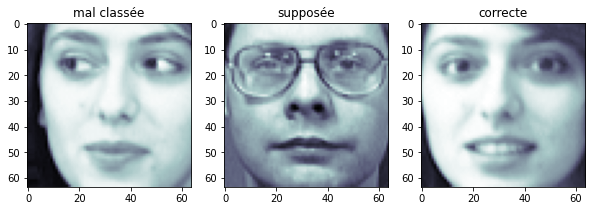

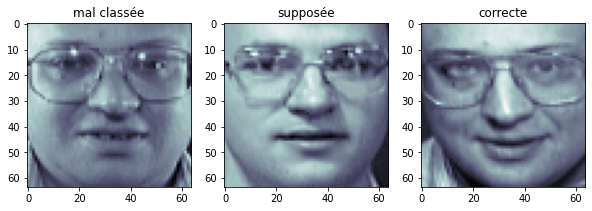

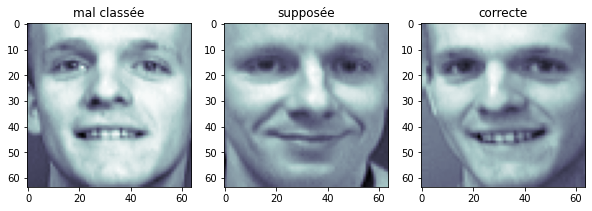

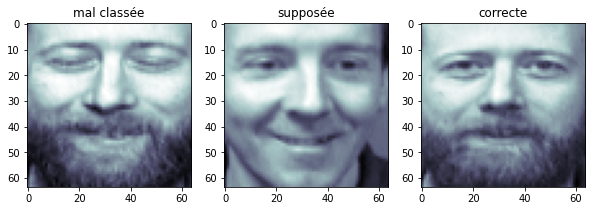

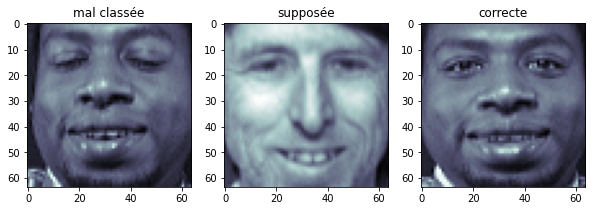

In [33]:
import numpy as np
tab = np.where(y_pred!=y_test)[0]
tab.size
for i in tab:

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
    
    ax1.imshow(X_test[i].reshape(64,64), cmap=plt.cm.bone)
    ax1.set_title("mal classée")

    ax2.imshow(faces.images[10*y_pred[i]], cmap=plt.cm.bone)
    ax2.set_title("supposée")

    ax3.imshow(faces.images[10*y_test[i]], cmap=plt.cm.bone)
    ax3.set_title("correcte")

    plt.show()

Pour la plupart des erreurs qu’on a obtenues on peut clairement constater une ressemblance entre le visage supposé et les visage correct, on peut voir des ressemblance niveaux du nez, la forme du visage la bouche …